In [2]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit, aqua
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *
provider = IBMQ.load_account()

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

from random import seed
from random import random
import cmath

from qiskit.circuit import Parameter

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


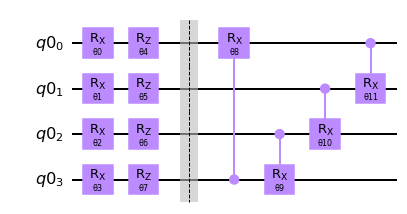

In [3]:
#circuit 19

qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(28):
    theta.append((Parameter('θ'+str(i))))
count=0
    
for i in range(4):
    qc.rx(theta[count],qr[i])
    count=count+1
    
for i in range(4):
    qc.rz(theta[count],qr[i])
    count=count+1
    
qc.barrier(qr)    

qc.crx(theta[count],qr[3],qr[0])
count=count+1
qc.crx(theta[count],qr[2],qr[3])
count=count+1
qc.crx(theta[count],qr[1],qr[2])
count=count+1
qc.crx(theta[count],qr[0],qr[1])


qc.draw('mpl')

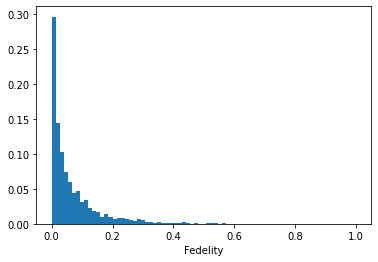

In [13]:
backend = Aer.get_backend('qasm_simulator')
nshot=1000
nparam=2000
fedelity=[]    
for x in range(nparam):
    
    theta=[]
    for y in range(30):
        theta.append(2*pi*random())
    
    
           
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr, cr)
    
    
    
    count=0
    
    for i in range(4):
        qc.rx(theta[count],qr[i])
        count=count+1
    
    for i in range(4):
        qc.rz(theta[count],qr[i])
        count=count+1
    

    qc.crx(theta[count],qr[3],qr[0])
    count=count+1
    qc.crx(theta[count],qr[2],qr[3])
    count=count+1
    qc.crx(theta[count],qr[1],qr[2])
    count=count+1
    qc.crx(theta[count],qr[0],qr[1])
    count=count+1
    
    qc.crx(theta[count],qr[0],qr[1])
    count=count+1
    qc.crx(theta[count],qr[1],qr[2])
    count=count+1
    qc.crx(theta[count],qr[2],qr[3])
    count=count+1
    qc.crx(theta[count],qr[3],qr[0])
    count=count+1
    
    for i in range(4):
        qc.rz(theta[count],qr[i])
        count=count+1
    
    for i in range(4):
        qc.rx(theta[count],qr[i])
        count=count+1
    
    
    
    
    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0000' in count and '1' in count:
        ratio=count['0000']/nshot
    elif '0000' in count and '1' not in count:
        ratio=count['0000']/nshot
    else:
        ratio=0
    
    fedelity.append(ratio)
    
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights, range=[0, 1])
plt.xlabel('Fedelity')
plt.show()

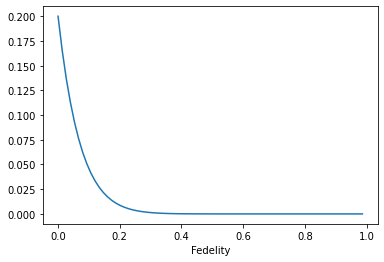

In [12]:
F_harr=[]
x_harr=[]
for i in range(75):
    x_harr.append(i/75)
    F_harr.append(((16-1)*((1-i/75)**(16-2)))/75)

plt.plot(x_harr,F_harr)
plt.xlabel('Fedelity')
plt.show()

In [5]:
#Kullback Leibler divergence
P_19=np.histogram(fedelity, bins=75, weights=weights, range=[0, 1])[0]
sum(P_19*np.log(P_19/F_harr))

<ipython-input-5-aaccba08a23d>:3: RuntimeWarning: divide by zero encountered in log
  sum(P_19*np.log(P_19/F_harr))
<ipython-input-5-aaccba08a23d>:3: RuntimeWarning: invalid value encountered in multiply
  sum(P_19*np.log(P_19/F_harr))


nan

In [9]:
P_19/F_harr

array([1.40000000e+00, 9.23155893e-01, 7.81072645e-01, 7.79211609e-01,
       6.08498144e-01, 5.38566069e-01, 6.26621120e-01, 7.39152724e-01,
       7.27615109e-01, 6.28683249e-01, 7.78502468e-01, 9.67224638e-01,
       6.31615363e-01, 7.54281295e-01, 1.08240863e+00, 1.13686838e+00,
       1.29461918e+00, 1.82740909e+00, 1.74840072e+00, 1.04535393e+00,
       2.30622295e+00, 2.23628715e+00, 2.25961038e+00, 2.10727342e+00,
       1.10622948e+00, 1.45964630e+00, 2.90518525e+00, 5.16987883e+00,
       6.94204903e+00, 7.03573231e+00, 6.38046747e+00, 8.73957314e+00,
       0.00000000e+00, 8.38122752e+00, 0.00000000e+00, 1.65942572e+01,
       7.09601382e+01, 3.40272885e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.77309725e+02,
       0.00000000e+00, 9.31322575e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [10]:
P_19

array([0.28  , 0.153 , 0.107 , 0.088 , 0.0565, 0.041 , 0.039 , 0.0375,
       0.03  , 0.021 , 0.021 , 0.021 , 0.011 , 0.0105, 0.012 , 0.01  ,
       0.009 , 0.01  , 0.0075, 0.0035, 0.006 , 0.0045, 0.0035, 0.0025,
       0.001 , 0.001 , 0.0015, 0.002 , 0.002 , 0.0015, 0.001 , 0.001 ,
       0.    , 0.0005, 0.    , 0.0005, 0.0015, 0.0005, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.0005, 0.    , 0.0005, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    ])